# bQTL-motif distance vs p-value: TF-MoDISco vs CISBP

- Calculate the distance between each bQTL SNP to its nearest MoDISco motif and to CIS-BP motif.
- Plot distance vs -log10(p-value)
- Cap the distance at 1000bp and plot the distance vs -log10(p-value)

In [5]:
from __future__ import print_function, division

import sys
import os
#import matplotlib as mpl
#mpl.use('Agg')

import numpy as np
import sys
import argparse

In [6]:
from collections import OrderedDict
tf_list = [ 'JUND', 'RELA', 'SPI1', 'STAT1']

tf_dict = OrderedDict()

for tf in tf_list:
    #with open("data/" + tf + "_sort.txt") as in_fh:
    with open("under_1ksummit/" + tf + "_sort.txt") as in_fh:

        lines = [ map(int, line.split()) for line in in_fh ]
        tf_dict[tf] = list(zip(*lines)) # transpose
        print(tf + " done")
            

JUND done
RELA done
SPI1 done
STAT1 done


JUND 90622 90622


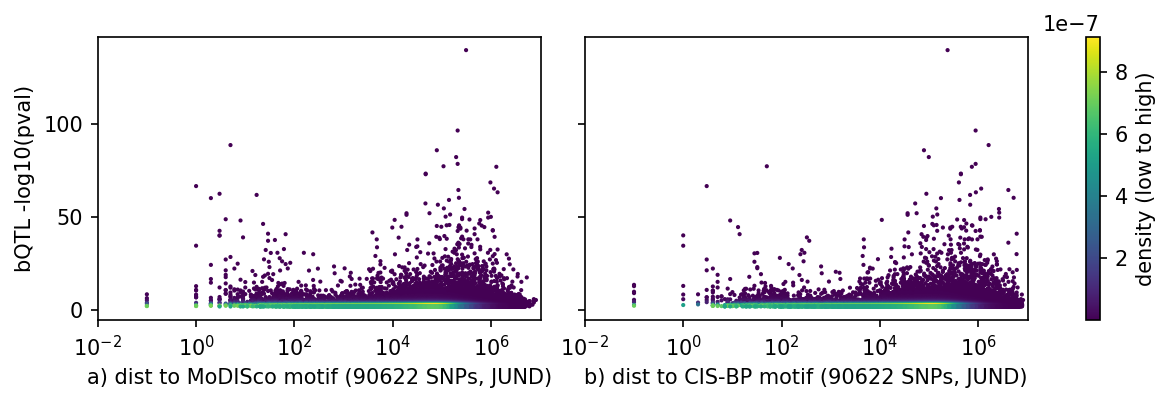

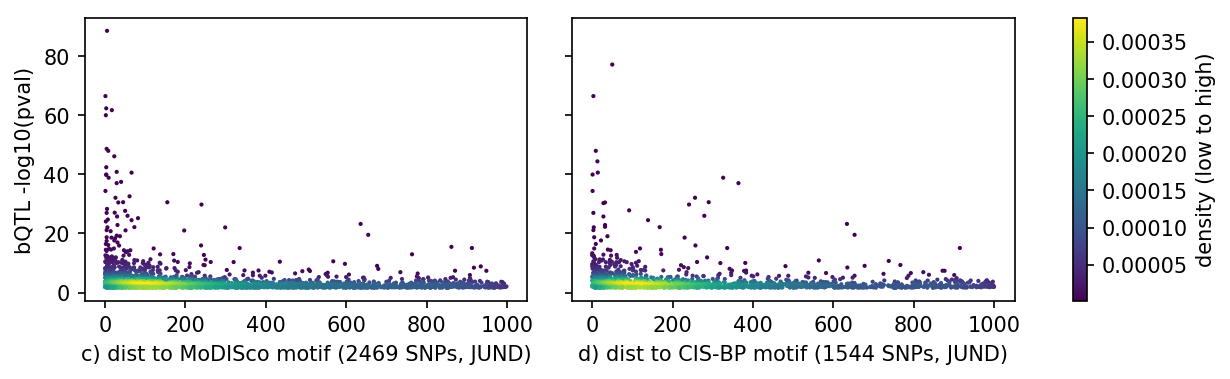

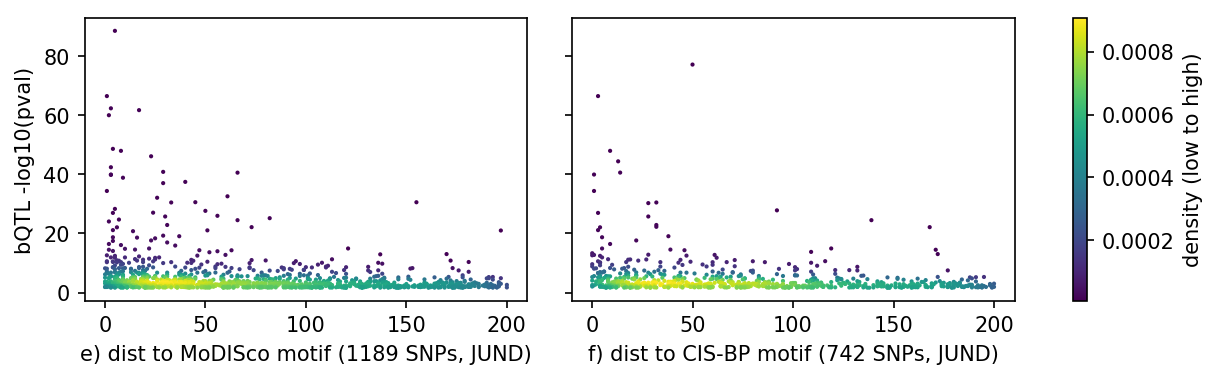

RELA 90616 90616


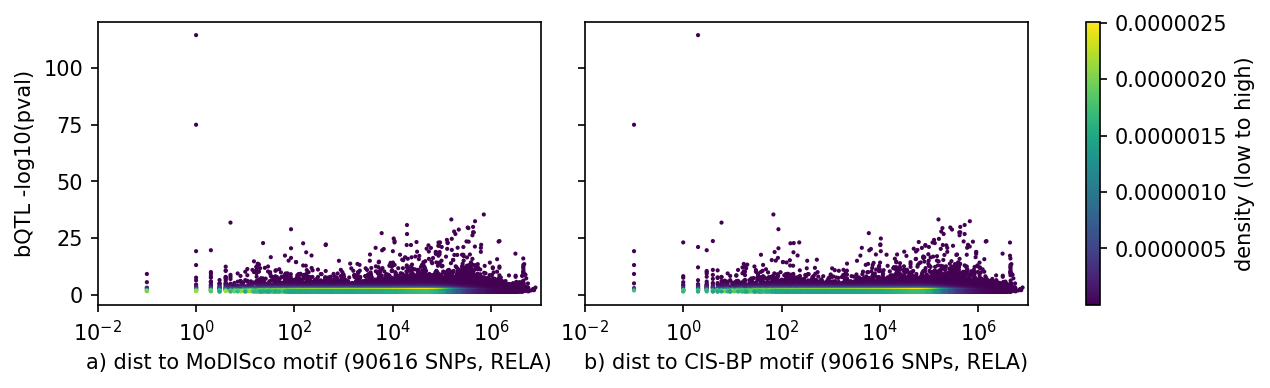

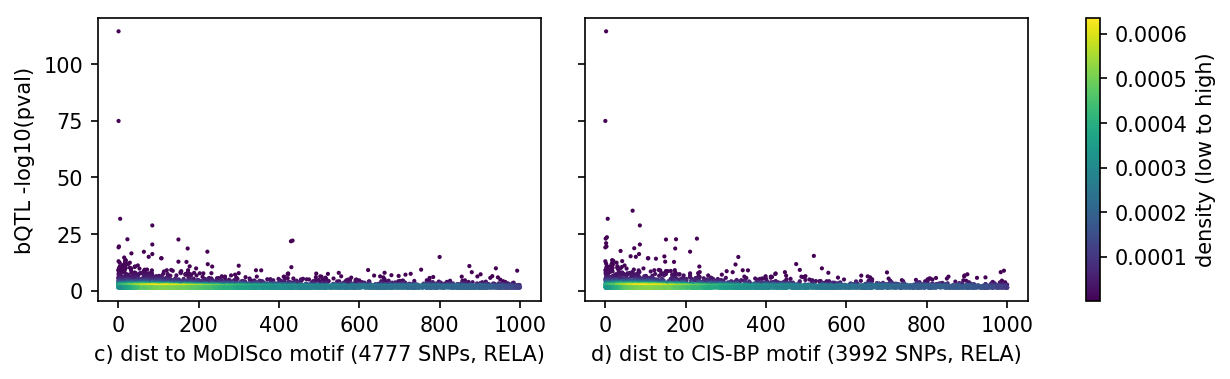

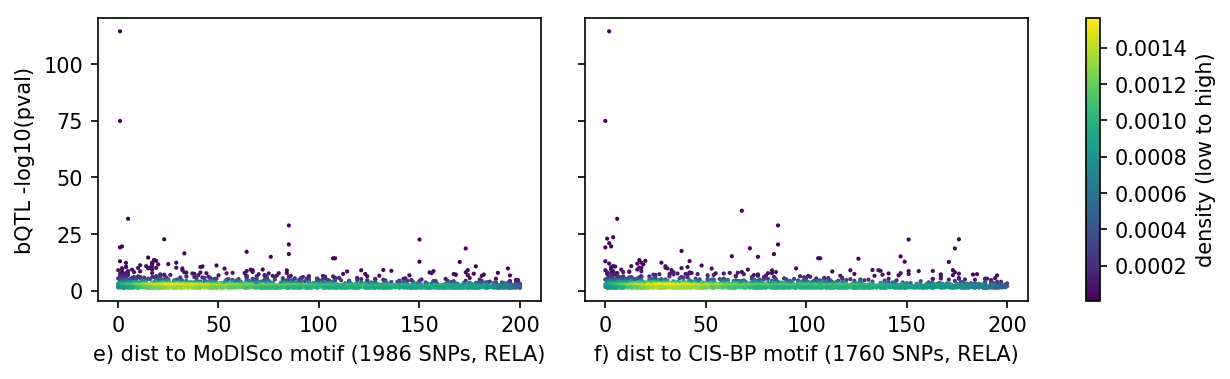

SPI1 90561 90561


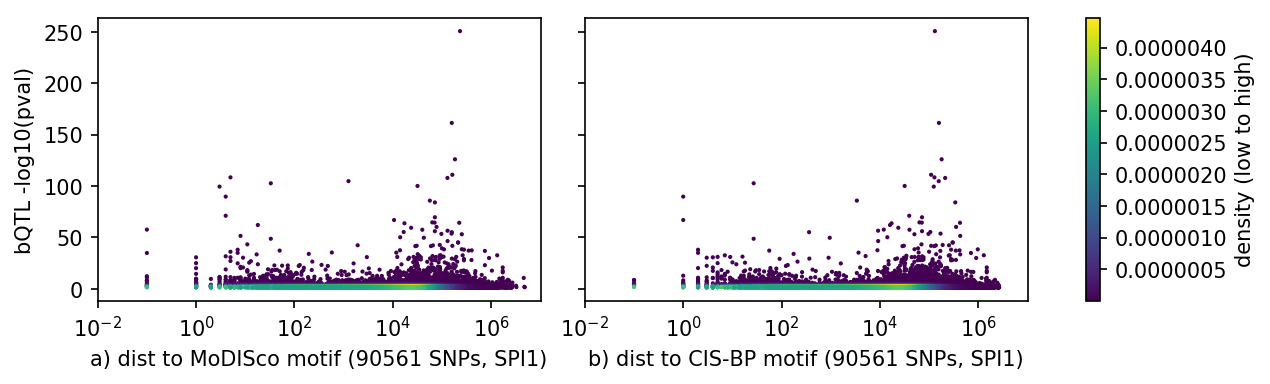

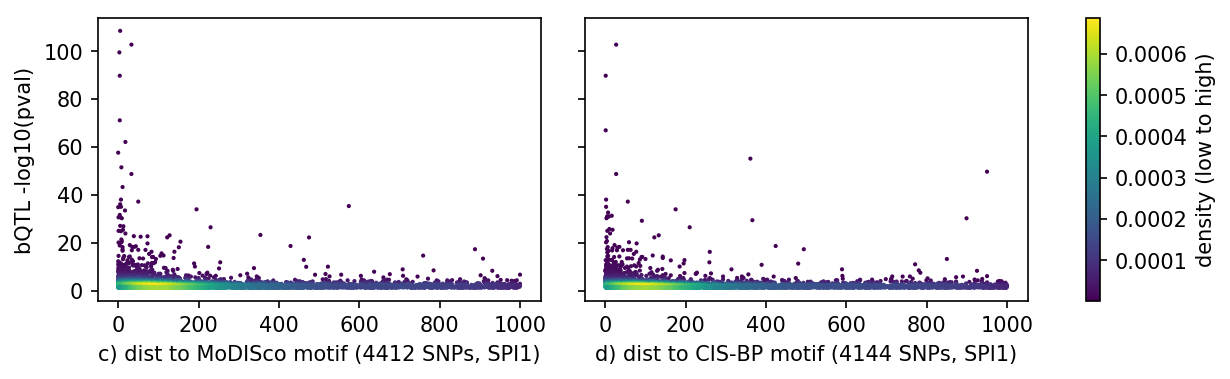

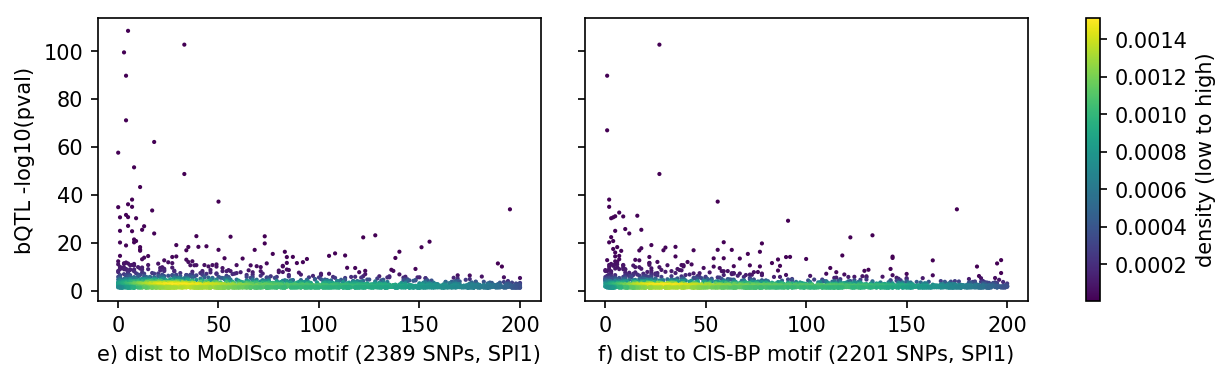

STAT1 89895 89895


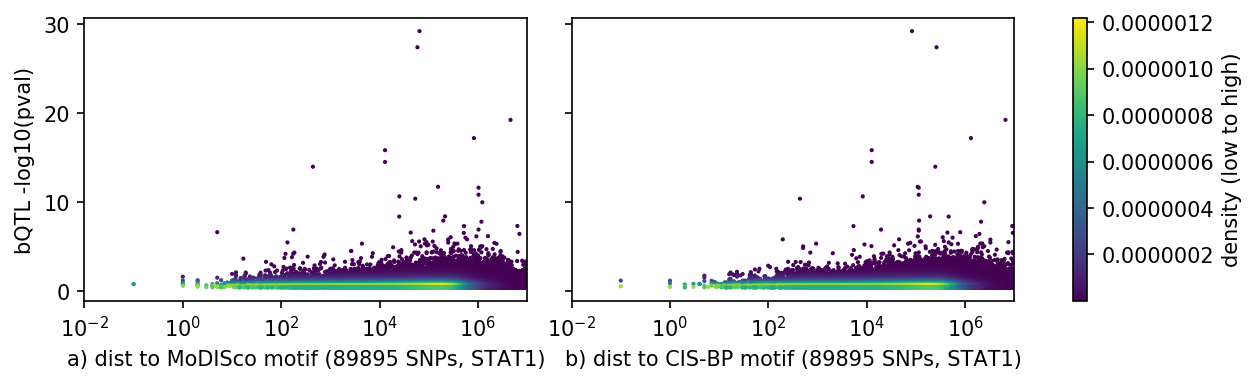

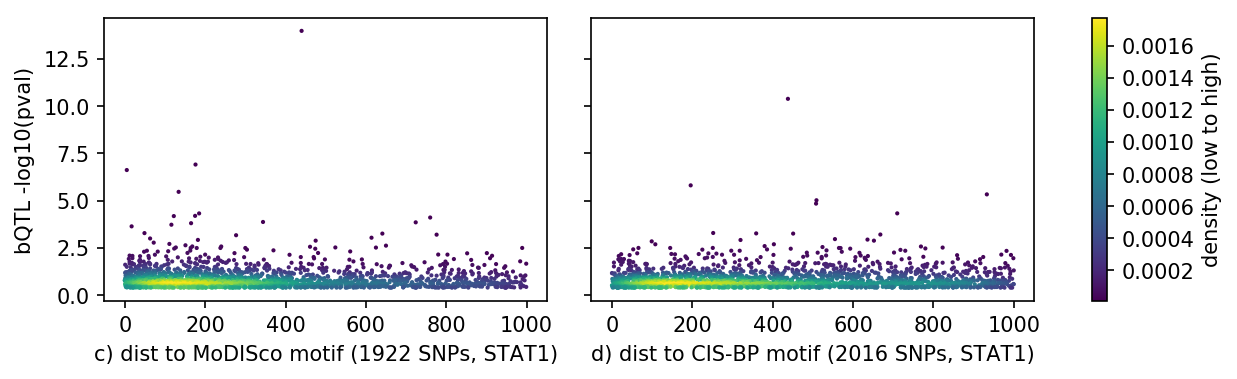

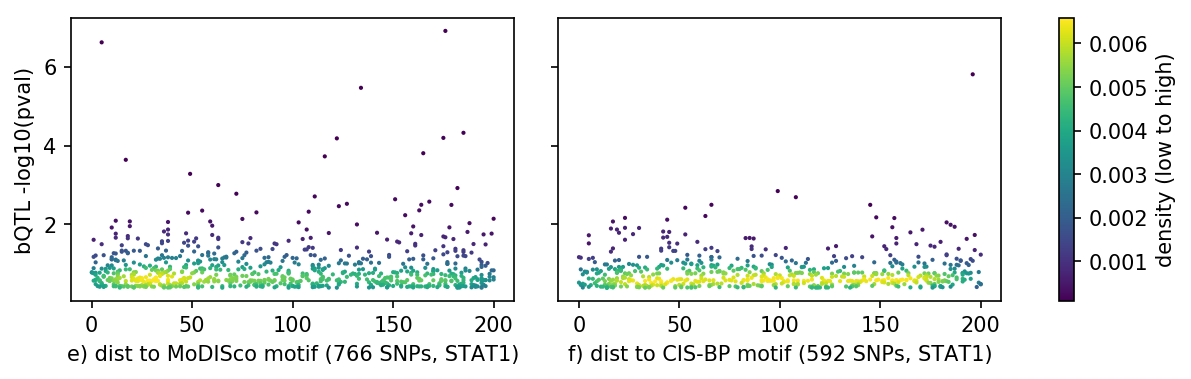

In [7]:
import math
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from scipy.stats import gaussian_kde
modisco_dir = "/home/ktian/kundajelab/tfnet/results/nandi/"

modisco_tsv_fns = [
    "JUND/JUND_GM12878_refine_18_09_04/modisco.run2/JUND_modisco_snp_dist_pval_big.tsv",
    "RELA/RELA_GM12878_refine_18_09_04/modisco.run3/RELA_modisco_snp_dist_pval_big.tsv",
    "SPI1/SPI1_GM12878_refine_18_09_04/modisco.run3/SPI1_modisco_snp_dist_pval_big.tsv",
    "STAT1/STAT1_GM12878_refine_18_09_04/modisco.run2/STAT1_modisco_snp_dist_pval_big.tsv",
]

for i, tf in enumerate(tf_list):


    snp_list_m = []
    with open(modisco_dir + modisco_tsv_fns[i]) as fh:
        for row in fh:
            item = row.split('\t')
            item[0] = float(item[0])
            item[1] = float(item[1])
            if item[0] == 0:
                item[0] = 0.1
            snp_list_m.append(item)

    snp_list_c = []
    with open("under_1ksummit/" + tf + "_cisbp_big.tsv") as fh:
        for row in fh:
            item = row.split('\t')
            item[0] = float(item[0])
            item[1] = float(item[1])
            if item[0] == 0:
                item[0] = 0.1
            snp_list_c.append(item)
   
    print(tf, len(snp_list_c), len(snp_list_m))
    #print(snp_list[:5])



    x = [item[0] for item in snp_list_m]
    y = [item[1] for item in snp_list_m]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    xc = [item[0] for item in snp_list_c]
    yc = [item[1] for item in snp_list_c]
    xyc = np.vstack([xc,yc])
    zc = gaussian_kde(xyc)(xyc)


    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 2.5), dpi= 150)
    fig.subplots_adjust(wspace=0.1)
    #fig.subplots_adjust(right=0.8)    
    im = ax1.scatter(x, y, 1, c=z, alpha=1, marker='o', label=".")
    ax1.set_xlabel("a) dist to MoDISco motif (" + str(len(x)) + " SNPs, " + tf + ")")
    ax1.set_ylabel("bQTL -log10(pval)")
    ax1.set_xscale('log')
    ax1.set_xlim([0.01, 1e7])

    im = ax2.scatter(xc, yc, 1, c=zc, alpha=1, marker='o', label=".")
    ax2.set_xlabel("b) dist to CIS-BP motif (" + str(len(xc)) + " SNPs, " + tf + ")")
    #ax2.set_ylabel("SNP -log10(pval)")
    ax2.set_xscale('log')
    ax2.set_xlim([0.01, 1e7])

    cbar = fig.colorbar(im, ax=[ax1, ax2], label='density (low to high)')
    #cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar

    plt.show()    
    fig.savefig("under_1ksummit/" + tf + "_cmp_log_big.png", bbox_inches='tight')
   
    x = [item[0] for item in snp_list_m if item[0] <= 1000]
    y = [item[1] for item in snp_list_m if item[0] <= 1000]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    xc = [item[0] for item in snp_list_c if item[0] <= 1000]
    yc = [item[1] for item in snp_list_c if item[0] <= 1000]
    xyc = np.vstack([xc,yc])
    zc = gaussian_kde(xyc)(xyc)
    

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 2.5), dpi= 150)
    fig.subplots_adjust(wspace=0.1)
    #fig.subplots_adjust(right=0.8)    
    im = ax1.scatter(x, y, 1, c=z, alpha=1, marker='o', label=".")
    ax1.set_xlabel("c) dist to MoDISco motif (" + str(len(x)) + " SNPs, " + tf + ")")
    ax1.set_ylabel("bQTL -log10(pval)")

    im = ax2.scatter(xc, yc, 1, c=zc, alpha=1, marker='o', label=".")
    ax2.set_xlabel("d) dist to CIS-BP motif (" + str(len(xc)) + " SNPs, " + tf + ")")
    #ax2.set_ylabel("bQTL -log10(pval)")

    cbar = fig.colorbar(im, ax=[ax1, ax2], label='density (low to high)')
    #cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
    #cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    plt.show()    
    fig.savefig("under_1ksummit/" + tf + "_cmp_1k_big.png", bbox_inches='tight')


    x = [item[0] for item in snp_list_m if item[0] <= 200]
    y = [item[1] for item in snp_list_m if item[0] <= 200]
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)

    xc = [item[0] for item in snp_list_c if item[0] <= 200]
    yc = [item[1] for item in snp_list_c if item[0] <= 200]
    xyc = np.vstack([xc,yc])
    zc = gaussian_kde(xyc)(xyc)
    

    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10, 2.5), dpi= 150)
    fig.subplots_adjust(wspace=0.1)
    #fig.subplots_adjust(right=0.8)    
    im = ax1.scatter(x, y, 1, c=z, alpha=1, marker='o', label=".")
    ax1.set_xlabel("e) dist to MoDISco motif (" + str(len(x)) + " SNPs, " + tf + ")")
    ax1.set_ylabel("bQTL -log10(pval)")

    im = ax2.scatter(xc, yc, 1, c=zc, alpha=1, marker='o', label=".")
    ax2.set_xlabel("f) dist to CIS-BP motif (" + str(len(xc)) + " SNPs, " + tf + ")")
    #ax2.set_ylabel("bQTL -log10(pval)")

    cbar = fig.colorbar(im, ax=[ax1, ax2], label='density (low to high)')
    #cbar = fig.colorbar(cax, ticks=[-1, 0, 1], orientation='horizontal')
    #cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    plt.show()    
    fig.savefig("under_1ksummit/" + tf + "_cmp_200_big.png", bbox_inches='tight')
    
    # https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib


In [8]:
!wc -l under_1ksummit/*sort.txt

  4361 under_1ksummit/JUND_sort.txt
  8917 under_1ksummit/RELA_sort.txt
 10747 under_1ksummit/SPI1_sort.txt
  1838 under_1ksummit/STAT1_sort.txt
 25863 total


above are the number of motifs for each TF in the CIS-BP database. The nearest motif center for a SNP is only calculated among motifs for the same TF. 